In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [83]:
df = pd.read_csv('中山大學選課小助手回饋表單 (Responses) - Form Responses 1.csv')
df.drop(columns=['呈上題，若是的話，請留下您的 Email', '您的系級'], inplace=True)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df.tail()

,學校選課系統目前最困擾您的問題是什麼？,呈上題，請詳述您的困擾,您會使用中山大學選課小助手作為選課的輔助工具嗎？,目前使用中山大學選課小助手，上手容易度為何？,目前使用中山大學選課小助手，體驗直覺度為何？,目前使用中山大學選課小助手，您的整體滿意度為何？,想要我們加入哪些新功能，或是哪些地方需要再改良呢？,是否想成為選課小助手的 Contributor?,還有什麼想和我們說的嗎？
Timestamp,,,,,,,,,
2024-01-30 12:46:44,瀏覽課程的困難,要一直點進去又點出來，重新排志願序就要先全部刪除,是,7.0,7.0,7.0,NaN,否,謝謝~
2024-01-31 15:55:36,驗證碼很煩,NaN,是,8.0,7.0,7.0,NaN,否,NaN
2024-02-01 10:49:48,驗證碼很煩,NaN,是,8.0,6.0,7.0,NaN,NaN,NaN
2024-02-01 15:04:05,驗證碼很煩,filters太多 每一個都是下滑選單很麻煩,是,7.0,8.0,8.0,可以增加顏色 例如博雅都是藍色 系必修都是白色 這樣排課真的完美,是,謝謝 超好用 但我大四才發現....
2024-02-19 23:01:40,全部,我轉學來不知道初選二就能選課了，現在課表全部空白，每天在查課跟找教室，這個好好用喔變成我的臨...,是,8.0,8.0,8.0,NaN,NaN,NaN


In [84]:
# 使用繁體中文字體
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

<BarContainer object of 13 artists>

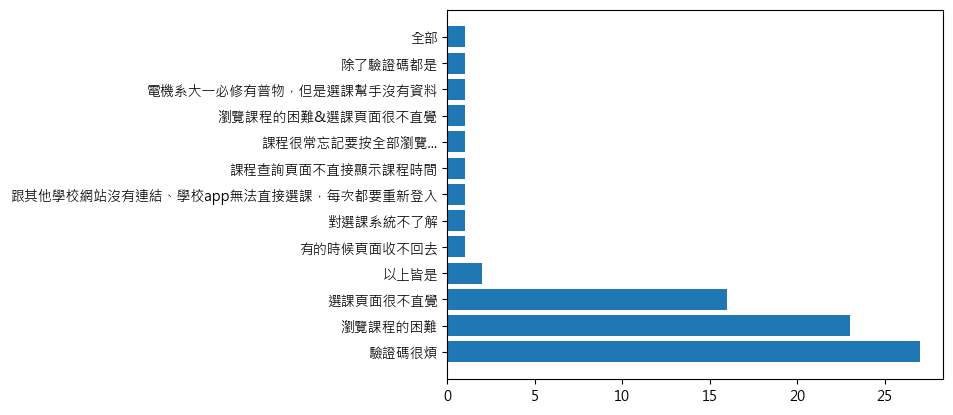

In [85]:
# 分析 "學校選課系統目前最困擾您的問題是什麼？" 的問題
plt.barh(df['學校選課系統目前最困擾您的問題是什麼？'].value_counts().index, df['學校選課系統目前最困擾您的問題是什麼？'].value_counts())

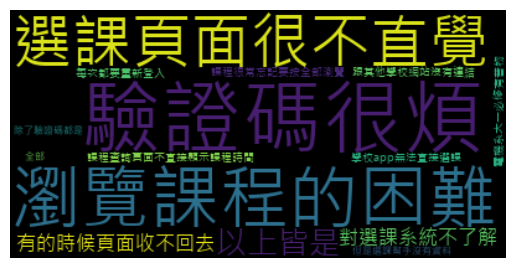

In [86]:
# 文字雲
text = ' '.join(map(str, df['學校選課系統目前最困擾您的問題是什麼？'].dropna()))
wordcloud = WordCloud(font_path='msjh.ttc').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

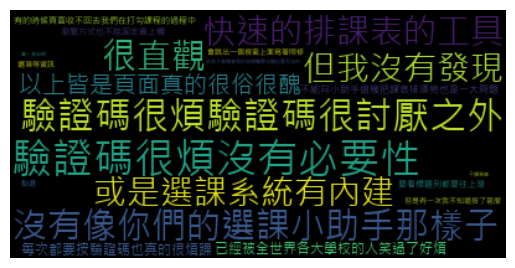

In [87]:
# 分析 "學校選課系統目前最困擾您的問題是什麼？" 結合 "呈上題，請詳述您的困擾" 的問題
df['學校選課系統目前最困擾您的問題是什麼？的詳細困擾'] = df['學校選課系統目前最困擾您的問題是什麼？'] + df['呈上題，請詳述您的困擾']
text = ' '.join(map(str, df['學校選課系統目前最困擾您的問題是什麼？的詳細困擾'].dropna()))
wordcloud = WordCloud(font_path='msjh.ttc').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

([<matplotlib.patches.Wedge at 0x1737cb184d0>,
 [Text(-1.0992121313309762, 0.04162559711058583, '是'),
  Text(1.0992121323052935, -0.04162557138166892, '否')],
 [Text(-0.5995702534532596, 0.022704871151228632, '98.8%'),
  Text(0.5995702539847054, -0.022704857117273953, '1.2%')])

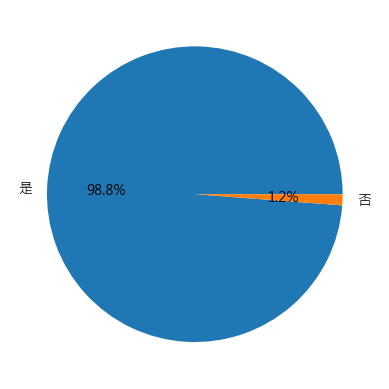

In [88]:
# 分析 "您會使用中山大學選課小助手作為選課的輔助工具嗎？" 的問題
plt.pie(df['您會使用中山大學選課小助手作為選課的輔助工具嗎？'].value_counts(), labels=df['您會使用中山大學選課小助手作為選課的輔助工具嗎？'].value_counts().index, autopct='%1.1f%%')

In [89]:
# 分析 "目前使用中山大學選課小助手，上手容易度為何？" (Score from 0 to 10) by "Timestamp" (6/4/2023 12:09:32 to 2/19/2024 23:01:40)
import pandas as pd
import matplotlib.pyplot as plt

def plot_monthly_average(df, column_name, title):
    """
    繪製特定欄位的每月平均分數時間序列圖。
    
    Args:
        df (pandas.DataFrame): 包含時間戳記和評分數據的DataFrame。
        column_name (str): 要分析的欄位名稱，應該是DataFrame中的一個列。
        title (str): 圖形的標題。
    
    Returns:
        None: 此函數不返回任何值，但會顯示一個時間序列圖。
    """
    # 使用resample按月分組並計算每組的平均值
    monthly_avg = df[column_name].resample('M').mean()

    # 繪製時間序列圖
    plt.figure(figsize=(10, 6))  # 設置圖形的大小
    plt.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-', color='b')  # 繪製每月平均分數
    plt.title(title)  # 設置圖形標題
    plt.xlabel('時間')  # X軸標籤
    plt.ylabel('平均分數')  # Y軸標籤
    plt.grid(True)  # 顯示網格
    plt.xticks(rotation=45)  # 旋轉X軸標籤，提高可讀性
    plt.tight_layout()  # 自動調整子圖參數，填充整個圖形區域

    # 顯示圖形
    plt.show()
    
def plot_score_distribution(df, column_name):
    """
    繪製特定欄位的分數分佈餅圖。
    
    Args:
        df (pandas.DataFrame): 包含評分數據的DataFrame。
        column_name (str): 要分析的欄位名稱，應該是DataFrame中的一個列。
    
    Returns:
        None: 此函數不返回任何值，但會顯示一個餅圖。
    """
    # 計算分數範圍的頻率
    score_ranges = ['0-2', '3-5', '6-8', '9-10']
    counts = [0] * len(score_ranges)  # 初始化計數列表

    # 分類每個評分到對應的範圍
    for score in df[column_name]:
        if score <= 2: counts[0] += 1
        elif score <= 5: counts[1] += 1
        elif score <= 8: counts[2] += 1
        else: counts[3] += 1

    # 繪製餅圖
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=score_ranges, autopct='%1.1f%%', startangle=140)
    plt.title('分數分佈')
    plt.show()

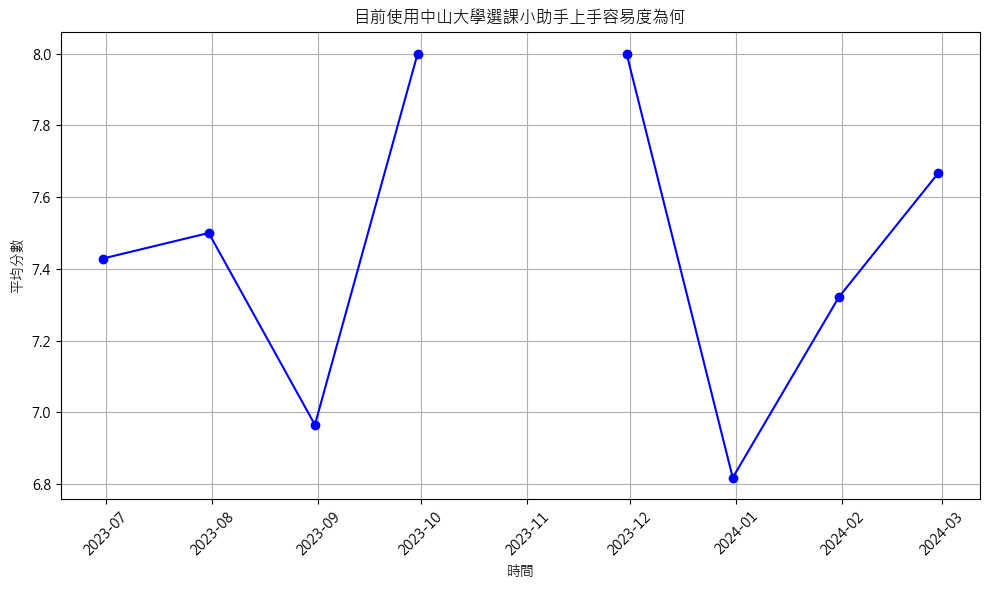

In [90]:
# 使用
plot_monthly_average(df, '目前使用中山大學選課小助手，上手容易度為何？', '目前使用中山大學選課小助手上手容易度為何')

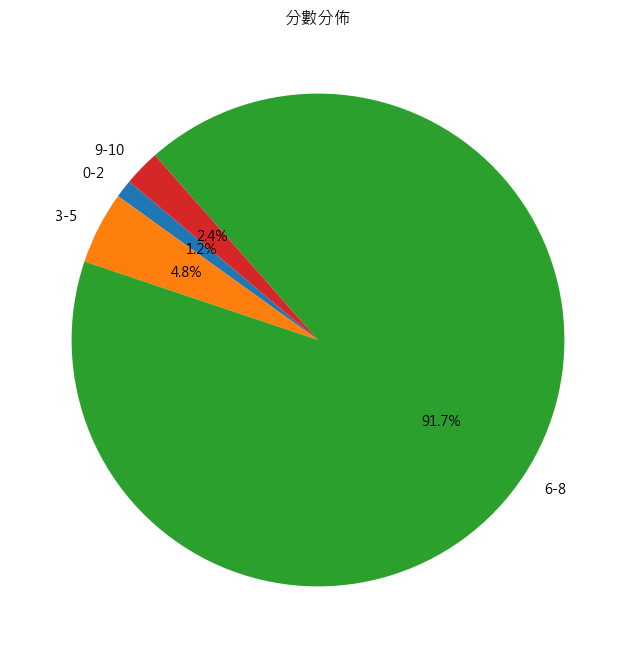

In [91]:
plot_score_distribution(df, '目前使用中山大學選課小助手，上手容易度為何？')

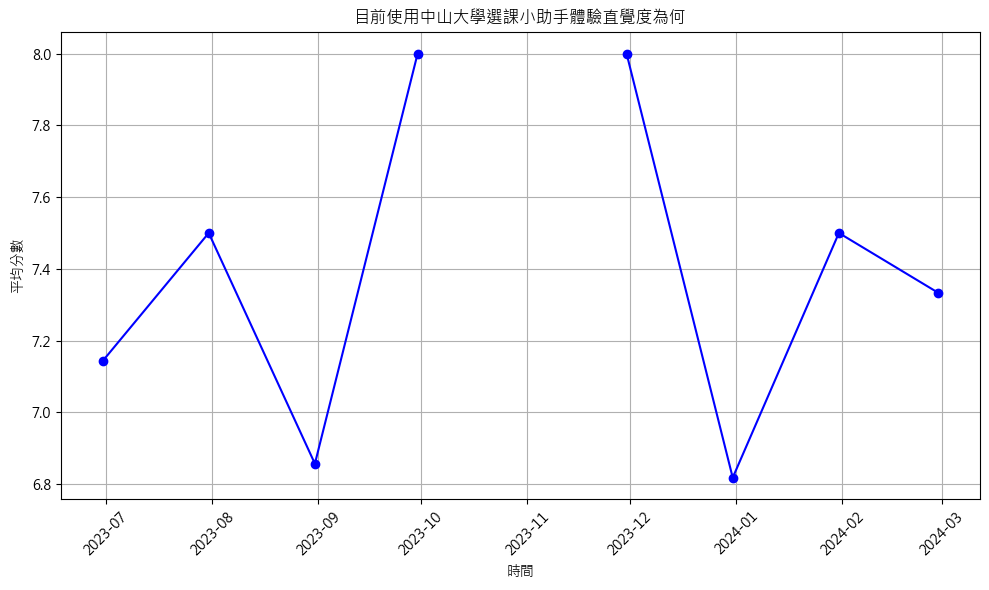

In [92]:
plot_monthly_average(df, '目前使用中山大學選課小助手，體驗直覺度為何？', '目前使用中山大學選課小助手體驗直覺度為何')

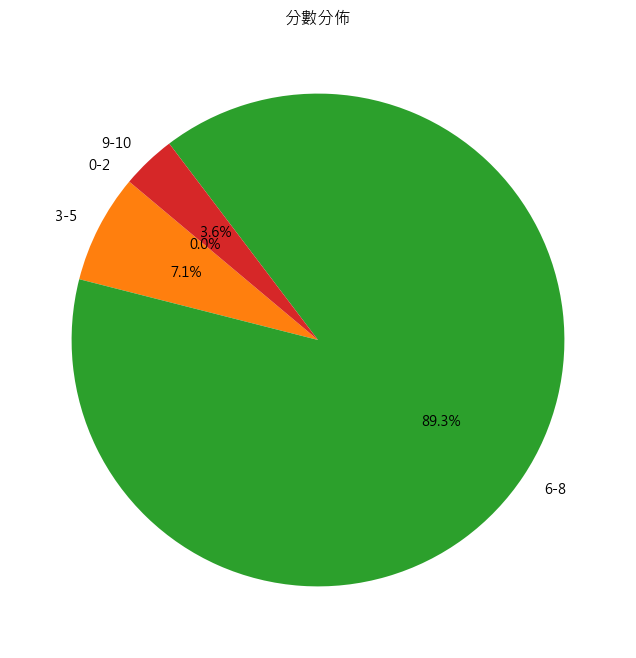

In [93]:
plot_score_distribution(df, '目前使用中山大學選課小助手，體驗直覺度為何？')

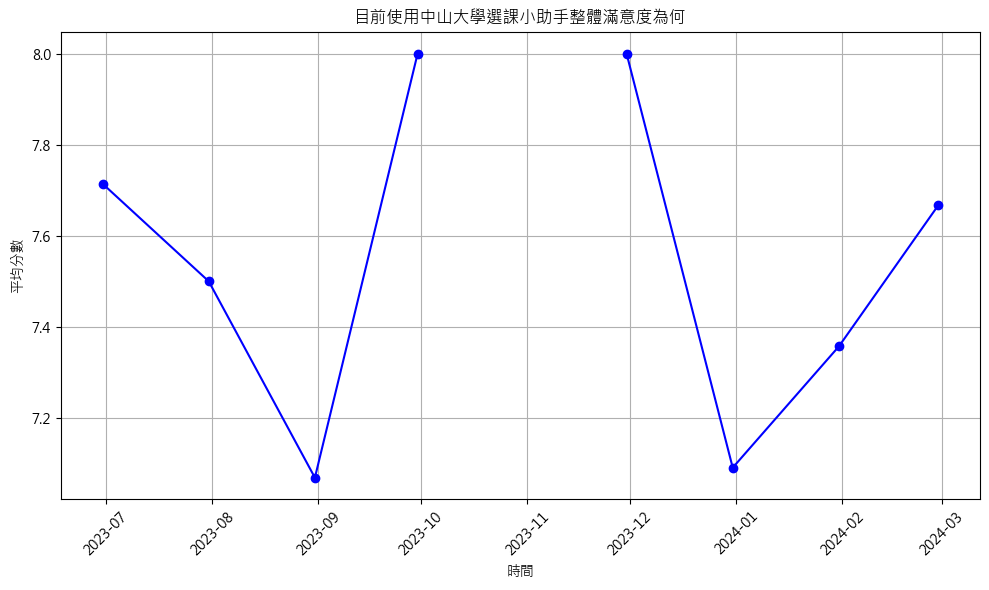

In [94]:
plot_monthly_average(df, '目前使用中山大學選課小助手，您的整體滿意度為何？', '目前使用中山大學選課小助手整體滿意度為何')

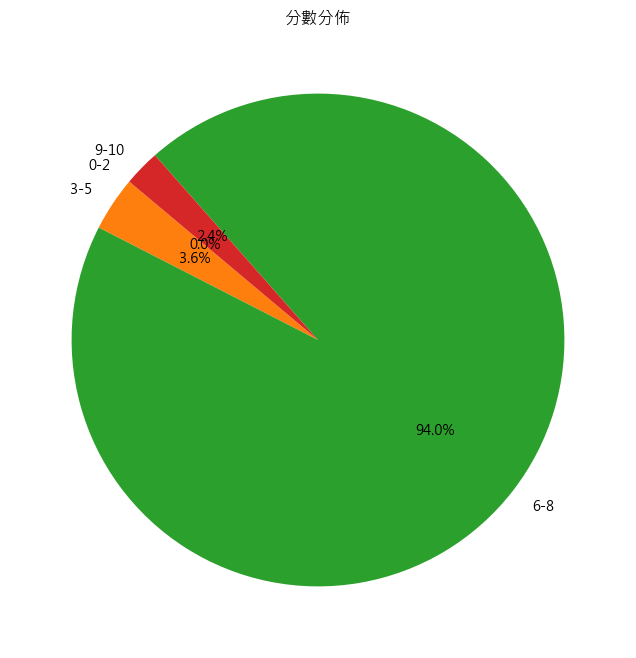

In [95]:
plot_score_distribution(df, '目前使用中山大學選課小助手，您的整體滿意度為何？')

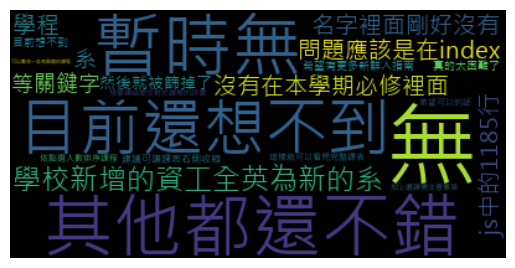

In [96]:
# 分析 "想要我們加入哪些新功能，或是哪些地方需要再改良呢？" 的問題
text = ' '.join(map(str, df['想要我們加入哪些新功能，或是哪些地方需要再改良呢？'].dropna()))
wordcloud = WordCloud(font_path='msjh.ttc').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

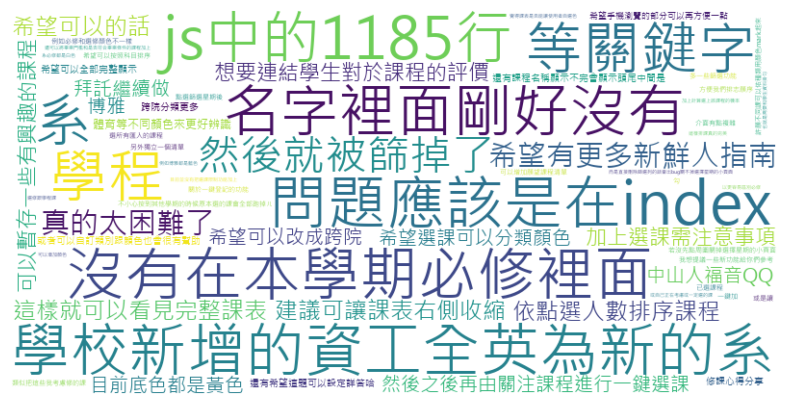

In [97]:
# 定義一個函數來檢查文本是否包含特定的關鍵詞
def contains_keywords(text, keywords):
    for keyword in keywords:
        if keyword in text:
            return True
    return False

# 要排除的關鍵詞列表
keywords_to_exclude = ["無", "想不到", "其他都還不錯"]

# 過濾掉包含特定關鍵詞的回答
filtered_responses = df['想要我們加入哪些新功能，或是哪些地方需要再改良呢？'].dropna().apply(lambda x: None if contains_keywords(x, keywords_to_exclude) else x)

# 去除None值後，將剩餘的回答聚合成單一文本字符串
text = ' '.join(filter(None, filtered_responses))

# 生成詞雲
wordcloud = WordCloud(font_path='msjh.ttc', width=800, height=400, background_color='white').generate(text)

# 顯示詞雲
plt.figure(figsize=(10, 5))  # 設置圖片大小
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不顯示軸線和標籤
plt.show()

([<matplotlib.patches.Wedge at 0x1737ce93ed0>,
 [Text(-1.03764300194601, 0.36509861751651845, '否'),
  Text(1.0376430104917593, -0.3650985932287314, '是')],
 [Text(-0.5659870919705509, 0.1991447004635555, '89.2%'),
  Text(0.5659870966318686, -0.19914468721567163, '10.8%')])

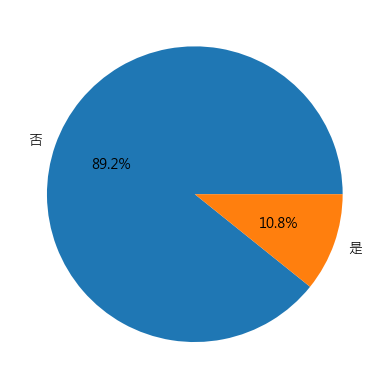

In [98]:
# 分析 "是否想成為選課小助手的 Contributor?" 的問題
plt.pie(df['是否想成為選課小助手的 Contributor?'].value_counts(), labels=df['是否想成為選課小助手的 Contributor?'].value_counts().index, autopct='%1.1f%%')

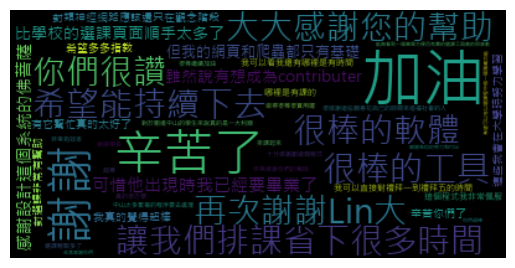

In [99]:
# 分析 "還有什麼想和我們說的嗎？" 的問題
text = ' '.join(map(str, df['還有什麼想和我們說的嗎？'].dropna()))
wordcloud = WordCloud(font_path='msjh.ttc').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()